In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import openpyxl
import seaborn as sns

import os, sys

%matplotlib inline

In [2]:
from box import Box
import glob

In [3]:
TOP = os.getcwd().replace("notebooks/tt", "")
D1 = TOP + 'data/'
figures_dir = TOP + 'manuscript/figures/'

In [4]:
file_list = glob.glob(D1 + "/*140823*.xlsx") # Include slash or it will search in the wrong directory!!


In [5]:
file_list.pop(-2)

'/home/grace/Documents/python/ml-tox/data/unbalanced_all_140823.xlsx'

In [6]:
file_list

['/home/grace/Documents/python/ml-tox/data/NM_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/CNN_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/ENN_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/TK_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/random_under_all_posthoc_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/SMOTE_over_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/random_under_all_140823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/liver_unbalanced_all_140823.xlsx']

In [7]:
mylst = []
for f in file_list:
    mylst.append(pd.read_excel(f))

In [8]:
df = pd.concat(mylst)

In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df.sampling.unique()

array(['under', 'over', 'unbalanced'], dtype=object)

In [11]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'unbalanced')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0,0.0,0.0,0.0,0.0
mean,0.735175,0.039525,0.806250,0.073850,0.337250,0.099475,0.641275,0.036825,0.696600,0.031250,NaN,NaN,NaN,NaN,NaN
std,0.076001,0.036894,0.155554,0.048267,0.205737,0.056571,0.049350,0.022643,0.040343,0.022777,NaN,NaN,NaN,NaN,NaN
min,0.461000,0.003000,0.385000,0.000000,0.000000,0.000000,0.442000,0.004000,0.586000,0.004000,NaN,NaN,NaN,NaN,NaN
25%,0.735250,0.019750,0.756000,0.045000,0.209500,0.069750,0.635750,0.024500,0.672250,0.017500,NaN,NaN,NaN,NaN,NaN
50%,0.756000,0.031000,0.832000,0.068500,0.359500,0.102500,0.648000,0.032500,0.698500,0.025000,NaN,NaN,NaN,NaN,NaN
75%,0.780500,0.047750,0.889500,0.105500,0.449750,0.128500,0.665750,0.049500,0.716250,0.040250,NaN,NaN,NaN,NaN,NaN
max,0.795000,0.173000,1.000000,0.200000,0.718000,0.235000,0.698000,0.112000,0.796000,0.114000,NaN,NaN,NaN,NaN,NaN


In [12]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'over') ].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0,0.0,0.0,0.0,0.0
mean,0.639725,0.072725,0.607350,0.119300,0.625700,0.115425,0.614350,0.054850,0.748150,0.070375,NaN,NaN,NaN,NaN,NaN
std,0.177268,0.029950,0.202502,0.050409,0.166114,0.052904,0.080882,0.025517,0.089633,0.101360,NaN,NaN,NaN,NaN,NaN
min,0.032000,0.023000,0.017000,0.023000,0.288000,0.018000,0.360000,0.008000,0.333000,0.019000,NaN,NaN,NaN,NaN,NaN
25%,0.649250,0.050750,0.572750,0.083750,0.519250,0.083500,0.609250,0.038250,0.728000,0.031000,NaN,NaN,NaN,NaN,NaN
50%,0.708500,0.071000,0.660000,0.123500,0.605000,0.113000,0.630500,0.052000,0.749000,0.041000,NaN,NaN,NaN,NaN,NaN
75%,0.732250,0.087750,0.739000,0.157000,0.700250,0.140250,0.661250,0.072500,0.778250,0.062250,NaN,NaN,NaN,NaN,NaN
max,0.781000,0.135000,0.830000,0.231000,0.992000,0.257000,0.714000,0.111000,0.916000,0.512000,NaN,NaN,NaN,NaN,NaN


In [13]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'under') & (df['mean_f1'] >0)].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,0.0,0.0,0.0,0.0,0.0
mean,0.522800,0.083184,0.472916,0.099816,0.692100,0.095416,0.550237,0.052437,0.722716,0.101732,NaN,NaN,NaN,NaN,NaN
std,0.223702,0.059592,0.258385,0.069204,0.227188,0.067884,0.100112,0.027599,0.139836,0.124138,NaN,NaN,NaN,NaN,NaN
min,0.008000,0.003000,0.004000,0.000000,0.000000,0.000000,0.352000,0.006000,0.129000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.375250,0.045000,0.266000,0.059000,0.603250,0.053000,0.470750,0.033000,0.702250,0.034250,NaN,NaN,NaN,NaN,NaN
50%,0.606000,0.072000,0.519000,0.091000,0.717000,0.085500,0.579500,0.050000,0.752000,0.052000,NaN,NaN,NaN,NaN,NaN
75%,0.688000,0.108000,0.639500,0.131750,0.857250,0.125000,0.632000,0.070000,0.785750,0.092750,NaN,NaN,NaN,NaN,NaN
max,0.787000,0.432000,1.000000,0.548000,1.000000,0.548000,0.703000,0.162000,1.000000,0.548000,NaN,NaN,NaN,NaN,NaN


In [14]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'unbalanced') & (df['mean_f1'] >0)].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,0.0,0.0,0.0,0.0,0.0
mean,0.088833,0.111333,0.080889,0.092778,0.923667,0.051000,0.784722,0.042889,0.179444,0.268333,NaN,NaN,NaN,NaN,NaN
std,0.052950,0.037633,0.098206,0.066012,0.101099,0.045792,0.069756,0.033580,0.089812,0.161620,NaN,NaN,NaN,NaN,NaN
min,0.025000,0.056000,0.022000,0.050000,0.558000,0.012000,0.540000,0.009000,0.029000,0.064000,NaN,NaN,NaN,NaN,NaN
25%,0.040000,0.083000,0.022000,0.050000,0.895750,0.023500,0.766250,0.022000,0.134250,0.143750,NaN,NaN,NaN,NaN,NaN
50%,0.090500,0.104000,0.056500,0.070000,0.968500,0.037500,0.810000,0.032000,0.167000,0.224000,NaN,NaN,NaN,NaN,NaN
75%,0.112500,0.145750,0.086250,0.101000,0.977000,0.061500,0.827250,0.048250,0.224750,0.447000,NaN,NaN,NaN,NaN,NaN
max,0.229000,0.165000,0.444000,0.324000,0.991000,0.175000,0.840000,0.132000,0.333000,0.471000,NaN,NaN,NaN,NaN,NaN


In [15]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'over') ].describe()


,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0,0.0,0.0,0.0,0.0
mean,0.233675,0.106800,0.426500,0.171850,0.633875,0.113750,0.598650,0.088575,0.197250,0.118000,NaN,NaN,NaN,NaN,NaN
std,0.075185,0.042147,0.273881,0.084511,0.259710,0.068977,0.174037,0.053829,0.058654,0.077305,NaN,NaN,NaN,NaN,NaN
min,0.074000,0.016000,0.067000,0.046000,0.009000,0.013000,0.168000,0.016000,0.079000,0.010000,NaN,NaN,NaN,NaN,NaN
25%,0.172250,0.091750,0.192750,0.100500,0.500000,0.058750,0.513500,0.047750,0.161750,0.067750,NaN,NaN,NaN,NaN,NaN
50%,0.246500,0.115000,0.421000,0.168000,0.698500,0.107500,0.653000,0.081000,0.187500,0.114000,NaN,NaN,NaN,NaN,NaN
75%,0.291500,0.137000,0.546000,0.228750,0.814250,0.163500,0.715750,0.122750,0.225750,0.144000,NaN,NaN,NaN,NaN,NaN
max,0.351000,0.185000,0.978000,0.355000,0.918000,0.284000,0.786000,0.227000,0.375000,0.372000,NaN,NaN,NaN,NaN,NaN


In [16]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'under') ].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,test_accuracy,test_f1,test_sensitivity,test_specificity,test_precision
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,0.0,0.0,0.0,0.0,0.0
mean,0.148565,0.084475,0.268315,0.144030,0.731920,0.084375,0.655265,0.065815,0.142930,0.114355,NaN,NaN,NaN,NaN,NaN
std,0.105193,0.054282,0.257309,0.107189,0.261292,0.069855,0.178645,0.049480,0.101203,0.126513,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.124000,0.000000,0.244000,0.008000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.039000,0.052500,0.024250,0.054500,0.475000,0.027500,0.481000,0.024750,0.070750,0.036000,NaN,NaN,NaN,NaN,NaN
50%,0.169000,0.090500,0.181000,0.130000,0.840000,0.070000,0.733500,0.054500,0.152000,0.066500,NaN,NaN,NaN,NaN,NaN
75%,0.235750,0.123250,0.496250,0.229250,0.969000,0.130500,0.824000,0.098000,0.196750,0.149000,NaN,NaN,NaN,NaN,NaN
max,0.343000,0.210000,0.878000,0.411000,1.000000,0.343000,0.836000,0.229000,0.467000,0.449000,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns.unique()

Index(['tox', 'classifier', 'mean_f1', 'std_f1', 'mean_sensitivity',
       'std_sensitivity', 'mean_specificity', 'std_specificity',
       'mean_accuracy', 'std_accuracy', 'mean_precision', 'std_precision',
       'dt', 'balance', 'sampling', 'level_0', 'LR', 'test_accuracy',
       'test_f1', 'test_sensitivity', 'test_specificity', 'test_precision',
       'est'],
      dtype='object')

In [18]:
df_melt = df.melt(id_vars = ['tox', 'classifier', 'balance'], value_vars = ['mean_f1'], var_name = 'perf')

In [20]:
df_melt

,tox,classifier,balance,perf,value
0,chr_liver,ANN1,NM,mean_f1,0.000
1,chr_liver,GenRA,NM,mean_f1,0.125
2,chr_liver,Gradient Boosting,NM,mean_f1,0.290
3,chr_liver,KNN,NM,mean_f1,0.411
4,chr_liver,LR,NM,mean_f1,0.164
...,...,...,...,...,...
5635,dev_liver,KNN,unbalanced,mean_f1,0.076
5636,dev_liver,LR,unbalanced,mean_f1,0.106
5637,dev_liver,NB,unbalanced,mean_f1,0.000
5638,dev_liver,Random Forest,unbalanced,mean_f1,0.000


In [21]:
df_melt2 = df.melt(id_vars = ['tox', 'classifier', 'balance'], value_vars = ['mean_f1', 'mean_sensitivity','mean_specificity','mean_precision', 'mean_accuracy' ], var_name = 'perf')

In [22]:
df_melt2[(df_melt2['tox'] == 'chr_liver') & (df_melt2['perf'] == 'mean_f1')].groupby('balance').mean()

,value
balance,
CNN,0.589125
ENN,0.245500
NM,0.317225
SMOTE,0.639725
TK,0.718700
random,0.612750
unbalanced,0.735175


In [29]:
df_melt3 = df.melt(id_vars = ['tox', 'classifier', 'balance', 'sampling'], value_vars = ['mean_f1', 'mean_sensitivity','mean_specificity','mean_precision', 'mean_accuracy' ], var_name = 'perf')

In [33]:
df_melt3[df_melt3['perf'] == 'mean_f1'].groupby(['tox',  'sampling','classifier',]).mean()

value
tox       sampling   classifier                
chr_liver over       ANN1               0.72620
                     GenRA              0.69720
                     Gradient Boosting  0.73320
                     KNN                0.24080
                     LR                 0.72880
                     NB                 0.66460
                     Random Forest      0.72580
                     SVC                0.60120
          unbalanced ANN1               0.78440
                     GenRA              0.75320
                     Gradient Boosting  0.75880
                     KNN                0.58500
                     LR                 0.75720
                     NB                 0.69540
                     Random Forest      0.76080
                     SVC                0.78660
          under      ANN1               0.49244
                     GenRA              0.56020
                     Gradient Boosting  0.55748
                     KNN                0.41088
                     LR                 0.54672
                     NB                 0.50044
                     Random Forest      0.51256
                     SVC                0.39256
dev_liver over       ANN1               0.18840
                     GenRA              0.28440
                     Gradient Boosting  0.14100
                     KNN                0.27160
                     LR                 0.20820
                     NB                 0.30020
                     Random Forest      0.15500
                     SVC                0.32060
          unbalanced ANN1               0.00000
                     GenRA              0.00800
                     Gradient Boosting  0.10780
                     KNN                0.07160
                     LR                 0.07200
                     NB                 0.05380
                     Random Forest      0.00660
                     SVC                0.00000
          under      ANN1               0.12332
                     GenRA              0.15692
                     Gradient Boosting  0.18584
                     KNN                0.15620
                     LR                 0.19996
                     NB                 0.13172
                     Random Forest      0.13228
                     SVC                0.10228

In [23]:
df_melt2[(df_melt2['tox'] == 'dev_liver') & (df_melt2['perf'] == 'mean_f1')].groupby('balance').mean()

,value
balance,
CNN,0.097175
ENN,0.119925
NM,0.205200
SMOTE,0.233675
TK,0.053050
random,0.267475
unbalanced,0.039975


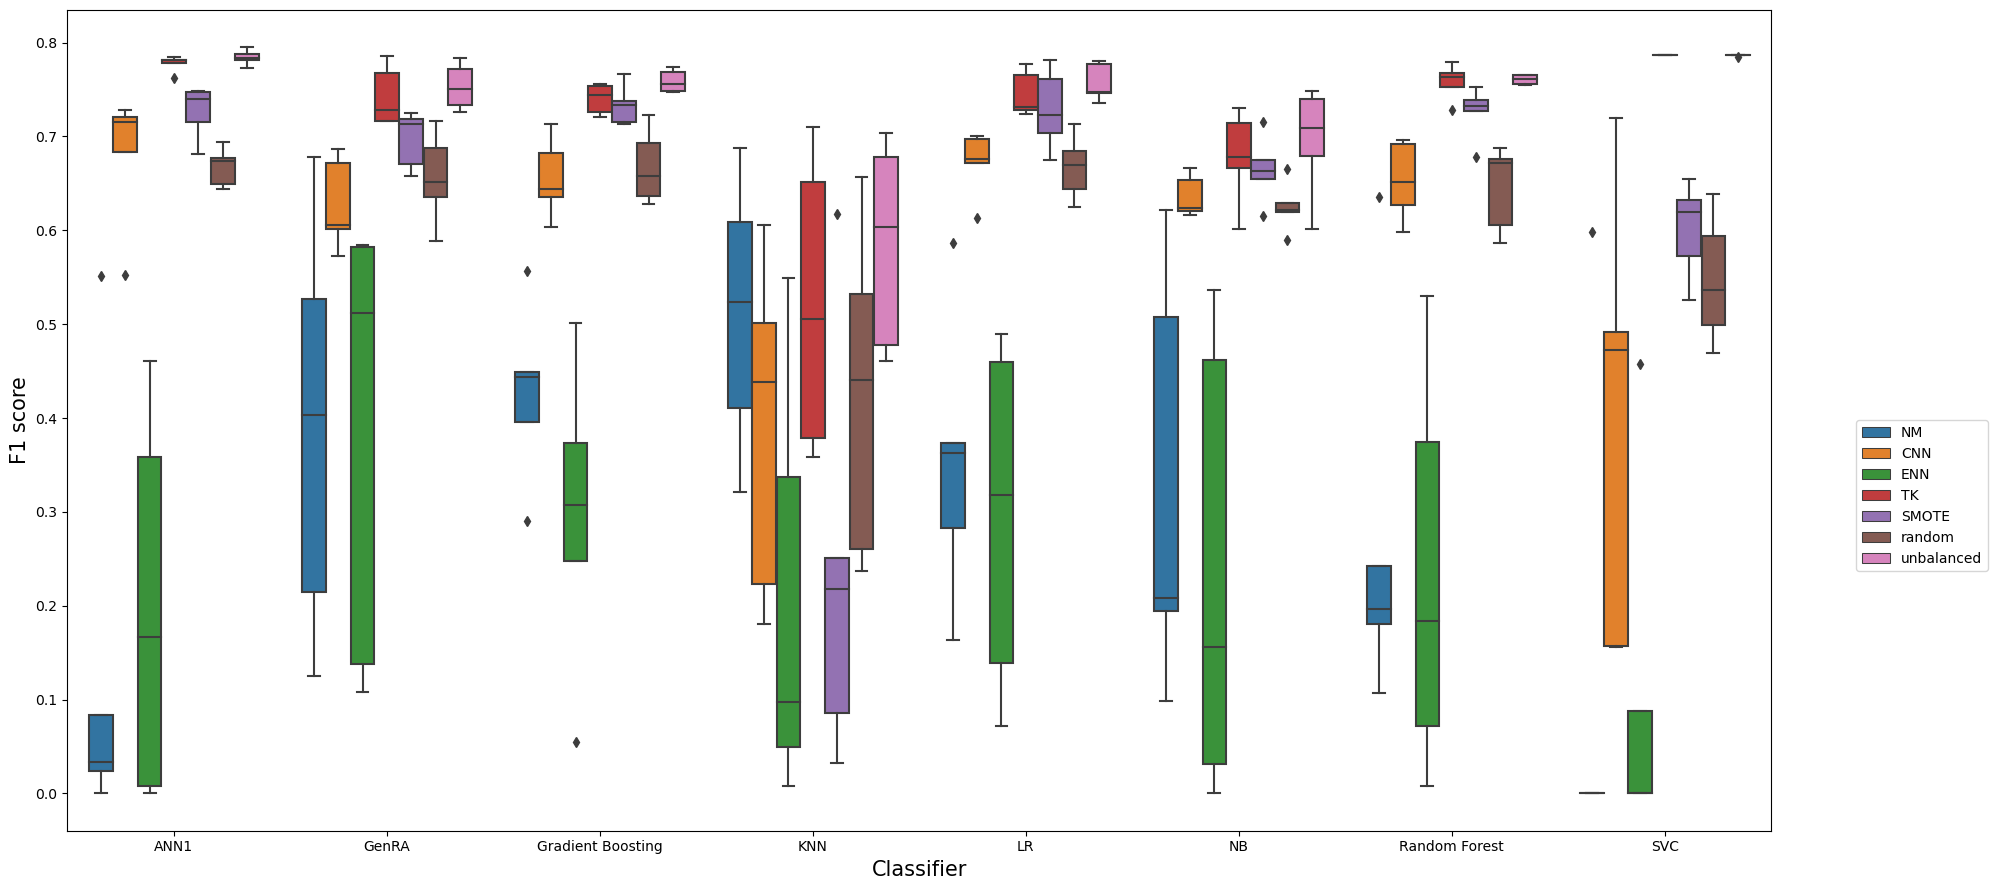

In [25]:
f,ax = plt.subplots(figsize = (20,9))
ax = sns.boxplot(x = 'classifier', y = 'value', hue = 'balance', data = df_melt[df_melt['tox']=='chr_liver'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)

ax.set_ylabel('F1 score', fontsize = 15)
ax.set_xlabel('Classifier', fontsize = 15)
plt.tight_layout()
f.savefig(figures_dir+'Figure5.png', dpi = 300)

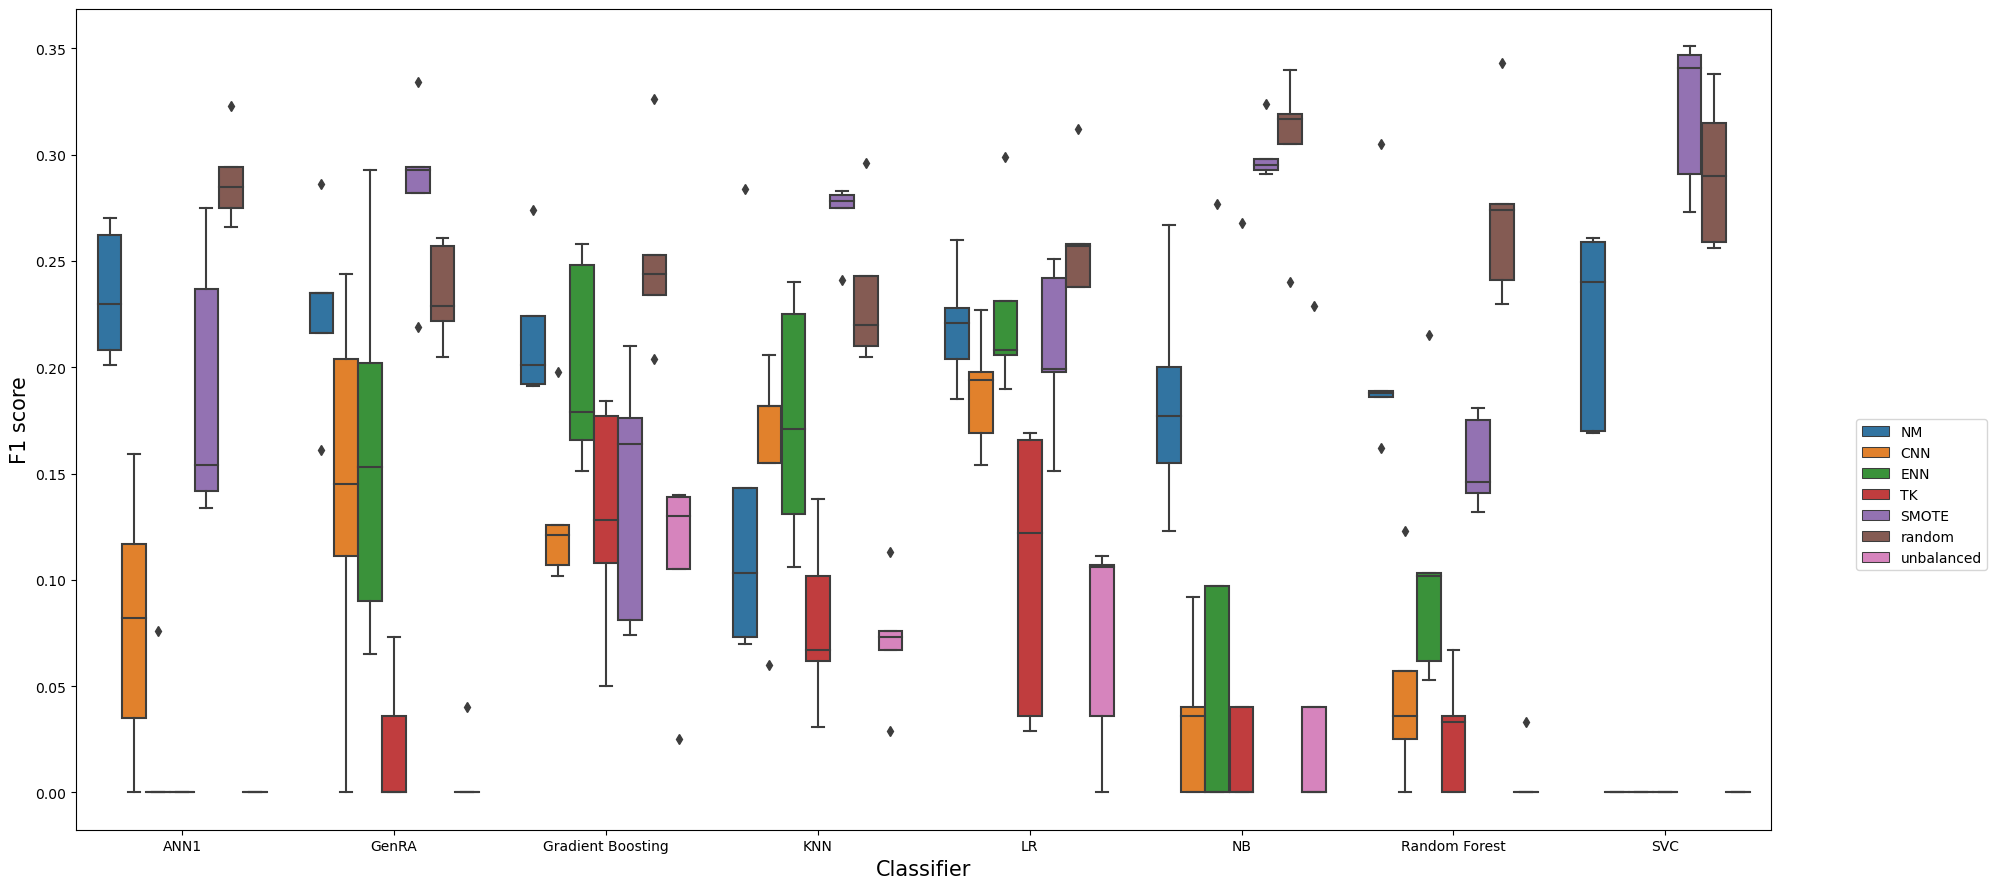

In [26]:
f,ax = plt.subplots(figsize = (20,9))
ax = sns.boxplot(x = 'classifier', y = 'value', hue = 'balance', data = df_melt[df_melt['tox']=='dev_liver'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1.05, 0.5), loc=2, borderaxespad=0.)

ax.set_ylabel('F1 score', fontsize = 15)
ax.set_xlabel('Classifier', fontsize = 15)
plt.tight_layout()
f.savefig(figures_dir+'Figure6.png', dpi = 300)

In [66]:
df_melt2['classifier'] = df_melt2['classifier'].replace('Gradient Boosting', 'GB')
df_melt2['classifier'] = df_melt2['classifier'].replace('Random Forest', 'RF')

In [67]:
clas = df_melt2.classifier.unique().tolist() + df_melt2.classifier.unique().tolist()

In [68]:
clas 

['ANN1',
 'GenRA',
 'GB',
 'KNN',
 'LR',
 'NB',
 'RF',
 'SVC',
 'ANN1',
 'GenRA',
 'GB',
 'KNN',
 'LR',
 'NB',
 'RF',
 'SVC']

In [69]:
toxics = ['chr_liver']*8 + ['dev_liver']*8

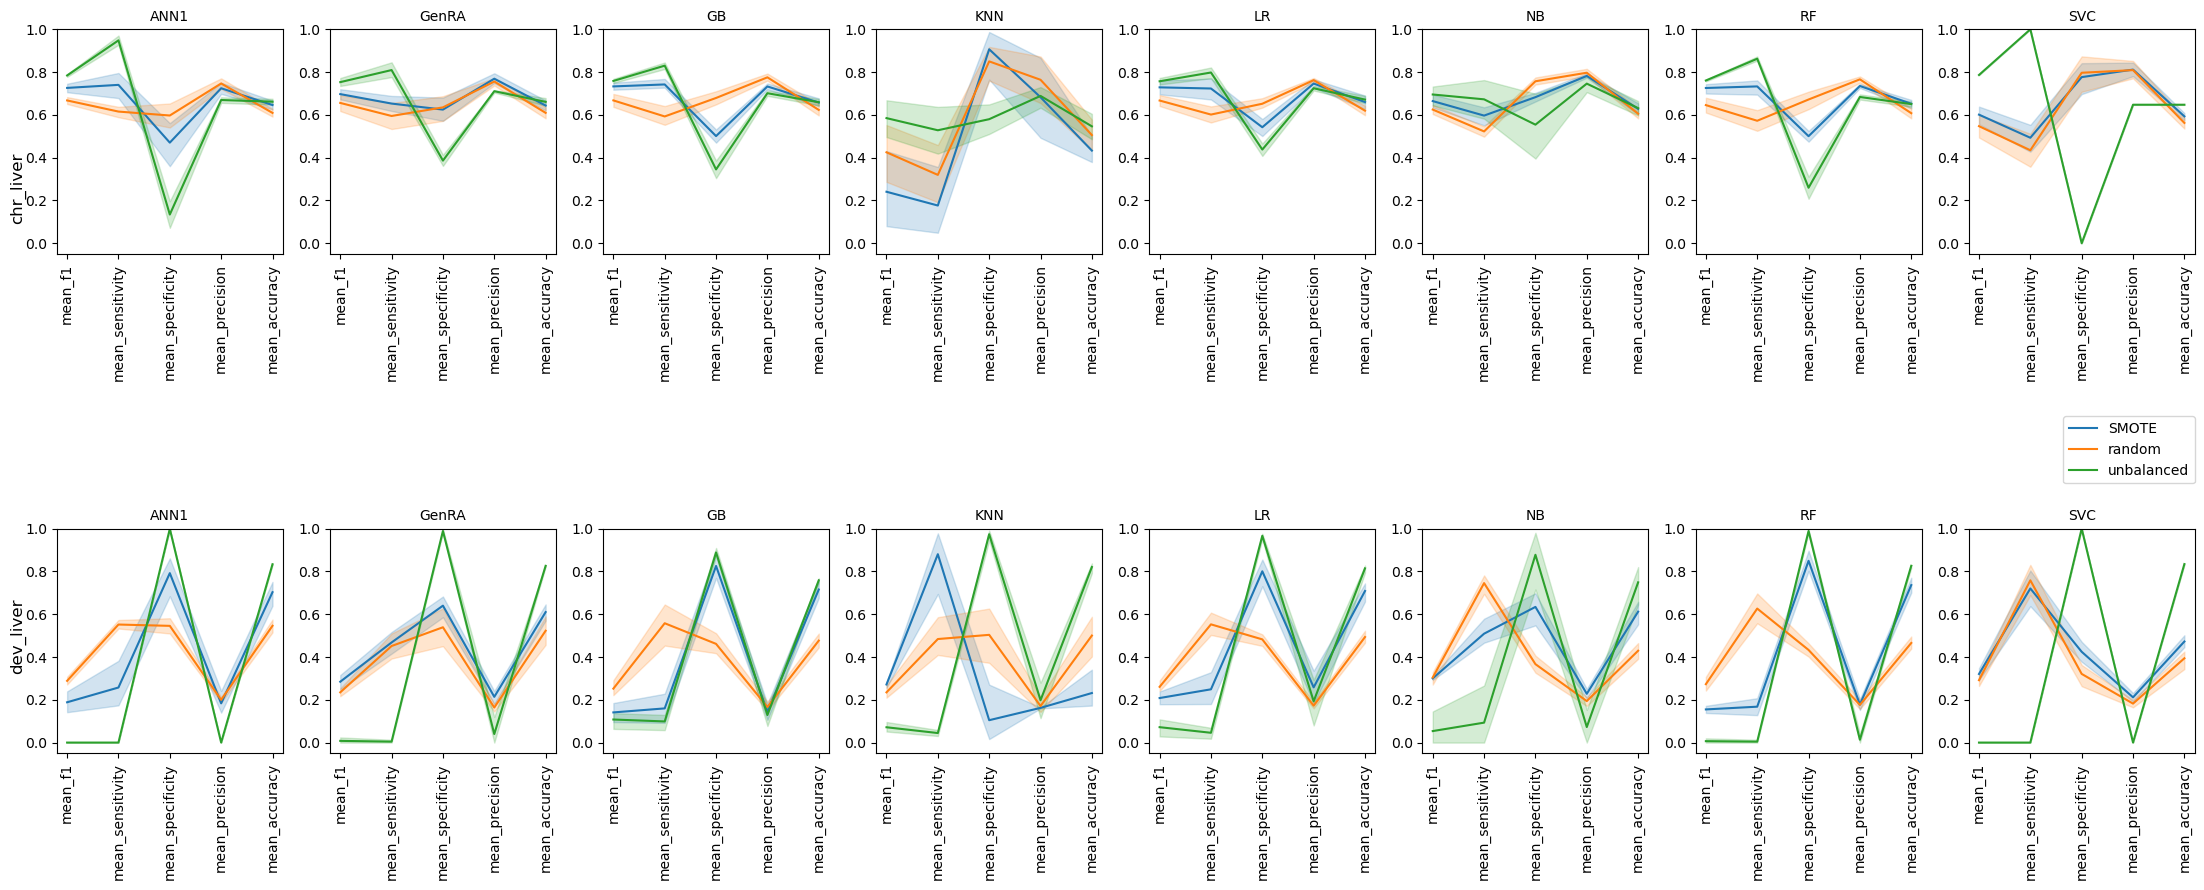

In [77]:
f1 = plt.figure(figsize = (22,9))

for c,e, num in zip(clas, toxics, range(1,18)):
    df0 = df_melt2[df_melt2['balance'].isin(['unbalanced', 'random', 'SMOTE'])]
    df1 = df0[(df0['tox'] == e) & (df0['classifier'] ==c)]
    ax1 = f1.add_subplot(2,8,num)
    g = sns.lineplot(x = 'perf', y = 'value', hue = 'balance', data = df1)
    for xlab in ax1.get_xticklabels():xlab.set_rotation(90)
    ax1.set_title(c, fontsize = 10)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_ylim(-0.05,1)
    ax1.get_legend().remove()
    handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1, 1.5), loc=1, borderaxespad=0.)
plt.subplots_adjust(bottom=0.25, right=0.75, top=0.9)
f1.text(0,0.75, "chr_liver", fontsize = 12, rotation = 'vertical')
f1.text(0,0.25, "dev_liver", fontsize = 12,rotation = 'vertical')
plt.tight_layout()
f1.savefig(figures_dir+'Figure7.png', dpi = 300)


In [32]:
for c, e, num in zip(clas, toxics, range(1,17)):
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [33]:
df_melt2[df_melt2['balance'] == 'SMOTE']

,tox,classifier,balance,perf,value
320,chr_liver,ANN1,SMOTE,mean_f1,0.747
321,chr_liver,GenRA,SMOTE,mean_f1,0.658
322,chr_liver,GB,SMOTE,mean_f1,0.713
323,chr_liver,KNN,SMOTE,mean_f1,0.032
324,chr_liver,LR,SMOTE,mean_f1,0.704
...,...,...,...,...,...
2635,dev_liver,KNN,SMOTE,mean_accuracy,0.175
2636,dev_liver,LR,SMOTE,mean_accuracy,0.744
2637,dev_liver,NB,SMOTE,mean_accuracy,0.664
2638,dev_liver,RF,SMOTE,mean_accuracy,0.782
